# Projet Intelligence Artificielle

Neil Desplats - Arthur Pinto Rosa - Hadrien Eyraud

# Prediction de la qualité de l'air à Grenoble

## Présentation du problème

La pollution de l'air représente un défi majeur dans de nombreuses villes à travers le monde, Grenoble étant un exemple illustratif. Bien que divers indicateurs soient utilisés pour évaluer la qualité de l'air, les modèles actuels ne couvrent souvent qu'un seul aspect, tel que les particules fines, les oxydes d'azote, l'ozone, ou le monoxyde de carbone.

### Pourquoi l'Intelligence Artificielle est Indispensable

L'utilisation de l'intelligence artificielle se justifie par la complexité inhérente à la prédiction de la qualité de l'air, qui ne peut être pleinement appréhendée par une simple approche statistique. Voici quelques raisons majeures :

#### Relations Non Linéaires

Les relations entre les différents indicateurs de qualité de l'air, les conditions météorologiques et les caractéristiques urbaines sont souvent non linéaires et complexes. L'IA est capable de capturer ces relations subtiles, là où les modèles statistiques classiques pourraient échouer.

#### Adaptabilité Dynamique

La qualité de l'air évolue de manière dynamique en fonction de divers facteurs. L'IA peut s'adapter et apprendre des modèles évolutifs, permettant ainsi une meilleure anticipation des changements rapides, contrairement à des modèles statistiques qui pourraient manquer de flexibilité.

#### Gestion de Données Hétérogènes

Les données sur la qualité de l'air, les prévisions météorologiques et les caractéristiques urbaines peuvent être hétérogènes et volumineuses. L'IA excelle dans la gestion et l'analyse de ces données complexes, fournissant ainsi une vision intégrée.

#### Facteurs Cachés

Certains facteurs influençant la qualité de l'air peuvent être cachés ou difficilement détectables par des approches statistiques traditionnelles. L'IA peut identifier des schémas subtils et des corrélations non évidentes, améliorant ainsi la précision des prédictions.

### Objectif du Projet

Nous souhaitons développer une solution  basée sur l'intelligence artificielle pour prédire la qualité de l'air à court terme dans la ville de Grenoble. En combinant la puissance de l'IA avec des données météorologiques et de pollution, nous visons à créer un modèle adaptable et holistique, allant au-delà des limites des approches statistiques conventionnelles.

## Jeu de données

### Données Météorologiques

Nous avons exploité les données de l'API OpenWeatherMap pour recueillir des informations météorologiques détaillées sur Grenoble. Ces données comprennent des paramètres tels que l'humidité, le point de rosée, la température moyenne, la vitesse et la direction du vent, etc. Cette approche nous a permis de constituer un ensemble de données riche et diversifié, couvrant une période étendue de plus d'un an et demi. La qualité de ces données météorologiques est cruciale pour établir des relations significatives entre les conditions météorologiques et la qualité de l'air.

### Données de Qualité de l'Air

Les données sur la qualité de l'air, essentielles à notre modèle, ont été obtenues à partir de l'API OpenMétéo. Ces données comprennent une variété de polluants atmosphériques tels que les particules fines, le monoxyde de carbone, le monoxyde d'azote, et d'autres. Nous avons récupéré des informations détaillées spécifiquement pour Grenoble sur une période similaire, soit plus d'un an et demi. Cette approche nous offre une vision complète de la pollution atmosphérique, permettant une modélisation robuste prenant en compte plusieurs polluants.

### Expérience Antérieure Réussie

Une expérience préliminaire menée à Louisville a montré des résultats prometteurs en utilisant les données météorologiques et les particules fines 24 heures en amont du vent. Forts de ces résultats positifs, nous étendons désormais notre approche pour inclure d'autres polluants et enrichir davantage notre ensemble de données. Cette expansion vise à renforcer la capacité de notre modèle à anticiper la qualité de l'air dans diverses conditions atmosphériques et environnementales.

### Objectif d'Entraînement du Modèle

L'ensemble de données ainsi constitué, couvrant une période significative et incluant une diversité de paramètres, servira à entraîner notre modèle d'intelligence artificielle. L'objectif est de permettre à notre modèle de comprendre les relations complexes entre les différentes variables météorologiques, les caractéristiques urbaines et les niveaux de pollution, afin de réaliser des prédictions précises et adaptées à Grenoble, et éventuellement, à d'autres villes.


## Génération des Connaissances

### Utilisation d'APIs Publiques

Notre approche repose sur l'utilisation de deux APIs publiques, OpenWeatherMap et OpenMétéo, pour collecter des données météorologiques et de qualité de l'air spécifiques à Grenoble. Cependant, en raison des restrictions quant au nombre d'appels quotidiens autorisés par ces APIs, nous avons dû élaborer une stratégie intelligente pour récupérer un jeu de données étendu sur la dernière année et demi.

### Stratégie de Récupération de Données

En raison des limitations de fréquence d'appels, nous avons mis en place un processus de récupération de données qui s'adapte aux contraintes imposées par les APIs. Plutôt que de chercher à récupérer toutes les données en une seule fois, nous avons opté pour des requêtes quotidiennes, travaillant avec la contrainte de nombre d'appels par jour.

### Automatisation avec Crontab

Pour implémenter notre stratégie de récupération, nous avons utilisé la planification de tâches à l'aide de la crontab. Un script de récupération de données a été configuré pour s'exécuter automatiquement à des intervalles réguliers, relançant le processus de collecte de données chaque jour. Cette approche nous a permis de rester dans les limites de requêtes autorisées tout en accumulant progressivement un jeu de données complet sur une période étendue.

### Agrégation des Données

À chaque exécution du script, les nouvelles données récupérées quotidiennement ont été ajoutées à notre ensemble de données principal. Cela a conduit à une accumulation graduelle et régulière de données météorologiques et de qualité de l'air sur plus de 500 jours. Cette méthode nous a permis de contourner les limitations tout en garantissant une couverture temporelle significative pour l'entraînement de notre modèle.

### Avantages de l'Approche

1. **Respect des Limites :** En respectant les limites d'appels quotidiens, nous avons assuré une utilisation éthique et conforme des APIs publiques.
   
2. **Intégration Continue :** L'automatisation du processus avec la crontab a facilité une intégration continue des nouvelles données dans notre ensemble existant, garantissant une mise à jour régulière et une couverture temporelle étendue.

3. **Évolutivité :** Cette méthode évolutive nous a permis de construire un ensemble de données robuste sur une période prolongée, crucial pour l'entraînement efficace de notre modèle prédictif.

### Conclusion pour récupération des connaissances générées

La combinaison de l'automatisation, de la planification régulière des tâches et de la gestion intelligente des quotas d'API a été essentielle pour générer un jeu de données significatif et fiable, posant ainsi les bases d'une modélisation précise de la qualité de l'air à Grenoble.

En raison de cette approche, il n'est pas possible de fournir directement un script pour récupérer les connaissances accumulées sur plus de 500 jours en raison des contraintes d'API. Cependant, nous mettons à disposition le jeu de données résultant au format CSV. Nous offrons également la présentation de nos scripts de récupération, illustrant le processus suivi pour générer cette base de connaissances étendue.

# <Mettre script `local_data.py` et expliquer avec nos API>
# Donner le fichier `training.csv`

# Expliquer que nos recherches bibliographiques nous ont poussées a utiliser KNN en premier model

In [22]:
import sys
import os
from datetime import datetime
sys.path.append(os.path.join(os.path.abspath('../')))

import requests
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt


from src.api.api import Api
from src.api.pollution_api import PollutionApi
from src.api.future_pollution import FuturePollutionApi
from src.api.predicted_weather import PredictedWeatherApi
from src.util.position_offsetter import PositionOffsetter

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

In [2]:
data = pd.read_csv('../data/training.csv')

data.drop(columns=['time'], inplace=True)

train_df, test_df = train_test_split(data, test_size=0.3)

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.reset_index(drop=True)
train_df.drop(columns=['co','no','no2','o3','so2','pm2_5','pm10','nh3'], inplace=True)
test_df = test_df.reset_index(drop=True)
test_df.drop(columns=['co','no','no2','o3','so2','pm2_5','pm10','nh3'], inplace=True)

stats={}

In [3]:
n_neighbors = range(1, 16)

maes = []
rmses = []
training_times = []
prediction_times = []

for k in n_neighbors:

    start_time = time.time()

    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()    
    predictions = knn_model.predict(test_df.drop(columns=['aqi']))
    end_time = time.time()
    prediction_time = end_time - start_time
    
    maes.append(np.mean(np.abs(predictions - test_df['aqi'])))
    rmses.append(np.sqrt(np.mean((predictions - test_df['aqi'])**2)))
    training_times.append(training_time)
    prediction_times.append(prediction_time)


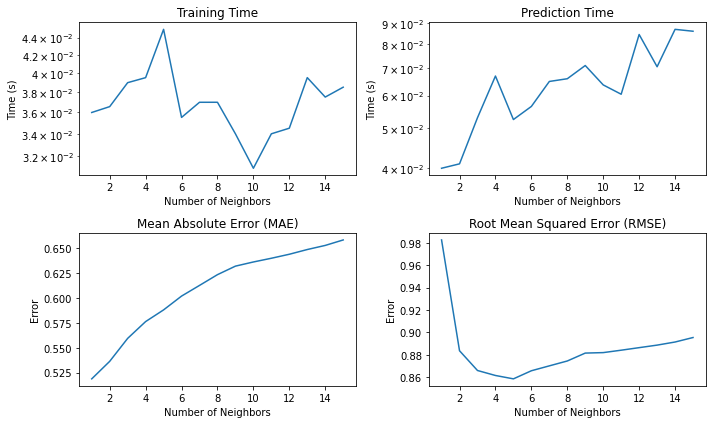

In [4]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(n_neighbors, training_times)
plt.title('Training Time')
plt.xlabel('Number of Neighbors')
plt.ylabel('Time (s)')
plt.yscale('log')

plt.subplot(2, 2, 2)
plt.plot(n_neighbors, prediction_times)
plt.title('Prediction Time')
plt.xlabel('Number of Neighbors')
plt.ylabel('Time (s)')
plt.yscale('log')

plt.subplot(2, 2, 3)
plt.plot(n_neighbors, maes)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')

plt.subplot(2, 2, 4)
plt.plot(n_neighbors, rmses)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')

plt.tight_layout()
plt.show()


# Expliquer que maintenant qu'on avait établit le meilleur KNN avec `n_neighbors=4`, on voulait comparer aux autres modèles

In [5]:
start_time = time.time()

knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()

training_time = end_time - start_time

start_time = time.time()

predictions = knn_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()

prediction_time = end_time - start_time

model = "KNeighborsRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [6]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'KNeighborsRegressor'
training_time = 0.03605461120605469
prediction_time = 0.04499936103820801
Mean Absolute Error (MAE): 0.5761490521942353
Root Mean Squared Error (RMSE): 0.8614312216743766
Coefficient of Determination (R-squared): 0.5189678023779567
Mean Absolute Percentage Error (MAPE): 31.827663810265733
      Expected Value  Predicted Value
1832             4.0             3.25
361              2.0             1.25
2309             2.0             3.00
2692             1.0             1.75
1621             1.0             1.00
2642             2.0             1.75
3234             2.0             1.50
3370             3.0             3.50
667              3.0             2.75
2222             4.0             4.00
3222             2.0             2.75
2573             3.0             2.75
472              2.0             1.75
3375             4.0             4.25
2437             1.0             1.00


In [7]:
start_time = time.time()

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
predictions = rf_model.predict(test_df.drop(columns=['aqi']))
end_time = time.time()
prediction_time = end_time - start_time

model = "RandomForestRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [8]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'RandomForestRegressor'
training_time = 5.1691577434539795
prediction_time = 0.055521249771118164
Mean Absolute Error (MAE): 0.4932303297844715
Root Mean Squared Error (RMSE): 0.6848087299562218
Coefficient of Determination (R-squared): 0.6960014540957449
Mean Absolute Percentage Error (MAPE): 28.783341989093742
      Expected Value  Predicted Value
2635             1.0             1.05
2660             2.0             1.77
1662             2.0             2.13
606              1.0             1.61
3731             2.0             1.68
1471             3.0             3.14
2864             1.0             1.17
374              4.0             2.97
1169             1.0             1.01
720              1.0             1.17
2319             2.0             1.96
3376             1.0             1.54
1898             1.0             1.02
1290             1.0             1.21
1081             1.0             1.17


In [9]:
start_time = time.time()

gb_model = GradientBoostingRegressor()
gb_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = gb_model.predict(test_df.drop(columns=['aqi']))
end_time = time.time()
prediction_time = end_time - start_time

model = "GradientBoostingRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [10]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'GradientBoostingRegressor'
training_time = 1.788196086883545
prediction_time = 0.006999015808105469
Mean Absolute Error (MAE): 0.6226228456296569
Root Mean Squared Error (RMSE): 0.8309626268165679
Coefficient of Determination (R-squared): 0.552393985969167
Mean Absolute Percentage Error (MAPE): 35.99260898014896
      Expected Value  Predicted Value
3047             2.0         1.109239
1775             1.0         1.907224
3340             1.0         1.973969
1717             4.0         3.262501
616              2.0         1.471311
24               3.0         2.181703
2383             1.0         1.058765
2619             1.0         1.127148
2606             1.0         2.417784
899              5.0         3.311856
2436             1.0         1.082113
428              2.0         1.884896
2011             3.0         2.139098
2066             1.0         1.313803
625              3.0         1.889499


In [11]:
start_time = time.time()

ada_model = AdaBoostRegressor()
ada_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = ada_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "AdaBoostRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [12]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'AdaBoostRegressor'
training_time = 0.3675696849822998
prediction_time = 0.006535530090332031
Mean Absolute Error (MAE): 0.8277030666332688
Root Mean Squared Error (RMSE): 0.9762273570530056
Coefficient of Determination (R-squared): 0.38221853000854034
Mean Absolute Percentage Error (MAPE): 53.97636890390321
      Expected Value  Predicted Value
1224             2.0         2.494966
3769             1.0         1.405493
2396             1.0         1.737852
3299             2.0         1.737852
1175             1.0         1.485419
3270             1.0         2.885146
2246             2.0         2.487597
2768             5.0         2.922131
288              1.0         1.653257
1986             1.0         1.615447
11               1.0         1.799114
3106             1.0         1.485419
3630             1.0         1.799114
2170             1.0         1.799114
3405             2.0         1.957041


In [13]:
start_time = time.time()

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = mlp_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "MLPRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [14]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'MLPRegressor'
training_time = 6.346762657165527
prediction_time = 0.006000995635986328
Mean Absolute Error (MAE): 0.7279234039015938
Root Mean Squared Error (RMSE): 0.9438223263001546
Coefficient of Determination (R-squared): 0.4225512800343234
Mean Absolute Percentage Error (MAPE): 45.6836290671535
      Expected Value  Predicted Value
3113             1.0         1.468211
1244             3.0         2.218848
3592             1.0         1.355023
1129             3.0         4.337843
3307             4.0         6.214943
903              2.0         2.410791
3568             2.0         2.266671
894              1.0         1.266549
3608             2.0         1.511694
2154             1.0         2.919494
1134             2.0         1.710498
550              2.0         1.433131
2262             4.0         3.666979
918              1.0         2.547703
1961             2.0         3.953718


In [15]:
start_time = time.time()

nb_model = GaussianNB()
nb_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = nb_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "GaussianNB"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [16]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'GaussianNB'
training_time = 0.004999399185180664
prediction_time = 0.003002643585205078
Mean Absolute Error (MAE): 0.7917424045702415
Root Mean Squared Error (RMSE): 1.2926695427954287
Coefficient of Determination (R-squared): -0.08319828242166039
Mean Absolute Percentage Error (MAPE): 34.92382930840474
      Expected Value  Predicted Value
2251             2.0              2.0
2646             2.0              1.0
3746             2.0              4.0
2168             1.0              1.0
3229             4.0              1.0
177              4.0              1.0
2211             4.0              1.0
1901             2.0              1.0
856              1.0              1.0
3831             1.0              1.0
2112             1.0              2.0
2849             2.0              1.0
436              1.0              1.0
2931             1.0              1.0
3                3.0              1.0


In [17]:
start_time = time.time()

perceptron_model = Perceptron()
perceptron_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = perceptron_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "Perceptron"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [18]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'Perceptron'
training_time = 0.03700065612792969
prediction_time = 0.0020012855529785156
Mean Absolute Error (MAE): 0.7338353674370294
Root Mean Squared Error (RMSE): 1.2168214230062218
Coefficient of Determination (R-squared): 0.04018700755737248
Mean Absolute Percentage Error (MAPE): 28.846187137540035
      Expected Value  Predicted Value
1246             1.0              1.0
3073             2.0              2.0
1449             1.0              1.0
1926             2.0              1.0
3158             3.0              2.0
1827             1.0              2.0
2667             2.0              3.0
168              5.0              5.0
481              2.0              2.0
1654             1.0              1.0
581              1.0              1.0
2798             2.0              1.0
2381             4.0              3.0
1161             1.0              1.0
1991             1.0              1.0


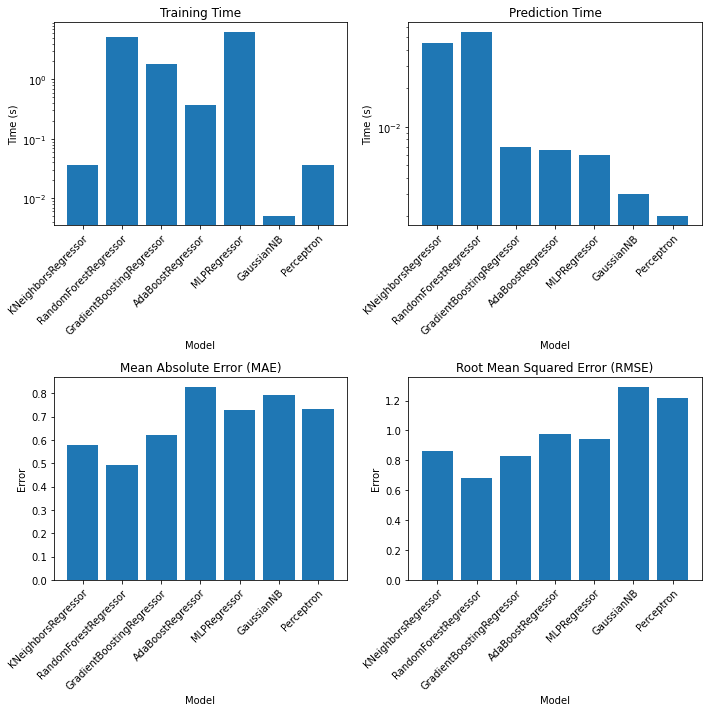

In [19]:
models = list(stats.keys())
training_times = [stats[model]['training_time'] for model in models]
prediction_times = [stats[model]['prediction_time'] for model in models]
maes = [stats[model]['mae'] for model in models]
rmses = [stats[model]['rmse'] for model in models]
r_squareds = [stats[model]['r_squared'] for model in models]
mapes = [stats[model]['mape'] for model in models]

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.bar(models, training_times)
plt.title('Training Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 2)
plt.bar(models, prediction_times)
plt.title('Prediction Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 3)
plt.bar(models, maes)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 4)
plt.bar(models, rmses)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()


## Évaluation des aspects environnementaux et s

Nous avons réalisé des mesures significatives de l'impact environnemental de notre projet d'intelligence artificielle en utilisant la bibliothèque Python CarbonTracker. Ces mesures ont été effectuées tant pendant la phase d'entraînement du modèle que lors de la phase de prédiction. Les résultats, présentés dans le tableau ci-dessous, sont exprimés en termes d'équivalent en mètres parcourus en voiture, une unité couramment utilisée pour quantifier les émissions de carbone. Les autres chiffres indiqués sont correspondent au grammes de CO2 produits lors du fonctionnement. Le calcul de l'équivalent CO2 utilise la valeur de 58.48 gCO2/kWh, qui correspond à l'intensité moyenne à Grenoble en 2021. On admet que le modèle sera beaucoup moins entraîné qu'il ne fera de prédictions (d'où le facteur 1000 entre les 2).

|    Modèle              | Entrainement (x10) | Equivalent en mètres parcourus en voiture | Prédiction (x 10000) | Equivalent en mètres parcourus en voiture |
|:------------------------:|:--------------------:|:-------------------------------------------:|:----------------------:|:-------------------------------------------:|
| KNN                    | ~0                 | ~0                                        | 0.442                | 4.11                                      |
| Random Forest          | 0.0411             | 0.383                                     | 0.222                | 2.07                                      |
| Gradient Boost         | 0.0466             | 0.434                                     | 0.100                | 0.930                                     |
| Ada Boost              | 0.00978            | 0.0910                                    | 0.173                | 1.61                                      |
| Multi-layer Perceptron | 0.0402             | 0.374                                     | 0.325                | 3.02                                      |
| Gaussian               | 0.000135           | 0.00125                                   | 0.101                | 0.942                                     |
| Perceptron             | 0.000684           | 0.00637                                   | ~0                   | ~0                                        |

### Analyse de l'Impact Environnemental

#### Entraînement du Modèle

Les modèles KNN, Gaussian et Perceptron présentent des impacts environnementaux minimes lors de la phase d'entraînement, s'approchant de zéro équivalent en mètres parcourus en voiture.
Les modèles Random Forest, Gradient Boost, et Multi-layer Perceptron présentent des impacts plus significatifs. 

#### Prédiction avec le Modèle

Le modèle KNN affiche un impact de prédiction plus élevé par rapport à son entraînement, avec un équivalent en mètres parcourus en voiture de 4.11.
Le modèle Perceptron montre la plus grande efficacité environnementale lors de la phase de prédiction, avec un impact minimal approximé à 0.

#### Choix du Modèle en Termes d'Impact Environnemental

En considérant l'ensemble des modèles, le Perceptron se distingue par son impact environnemental relativement bas, tant pendant l'entraînement que la prédiction.
Cependant, il est essentiel de noter que le choix du modèle optimal ne doit pas se faire uniquement sur la base de l'impact environnemental, mais également en prenant en compte la précision et la performance du modèle dans la résolution du problème spécifique de qualité de l'air. Ainsi, il est recommandé de trouver un équilibre entre l'efficacité environnementale et les performances du modèle. En tenant compte de ces 2 critères, le perceptron, qui à des prédictions trop biaisées par rapport à la réalité ne peut-être sélectionné.

### Impact Sociétal du Projet

Notre projet d'intelligence artificielle visant à prédire la qualité de l'air présente également des implications sociétales qui méritent d'être évaluées. Voici une analyse de l'impact potentiel de notre projet sur la société :

#### Amélioration de la Santé Publique

En anticipant la qualité de l'air, notre modèle offre la possibilité aux autorités locales et aux résidents de prendre des mesures préventives en cas de niveaux de pollution élevés. Cela peut contribuer à réduire les risques sanitaires associés à la pollution de l'air, améliorant ainsi la santé globale de la population.

#### Urbanisme Durable

Les données météorologiques et de qualité de l'air collectées peuvent être utilisées pour orienter les décisions d'urbanisme vers des solutions plus durables et respectueuses de l'environnement. Cela pourrait avoir un impact positif sur la planification urbaine en favorisant des politiques et des infrastructures qui réduisent la pollution atmosphérique.

#### Sensibilisation à la Pollution de l'Air

Notre projet peut contribuer à sensibiliser la population à la problématique de la pollution de l'air en fournissant des informations prédictives accessibles. Une meilleure compréhension des enjeux environnementaux peut conduire à des comportements individuels plus responsables et à des initiatives collectives en faveur de la qualité de l'air.

#### Prise de Décision Informée

Les données générées par notre modèle peuvent être utilisées par les autorités locales pour prendre des décisions informées en matière de gestion de la qualité de l'air. Cela inclut la mise en œuvre de mesures d'urgence, la planification de la circulation, et d'autres initiatives visant à réduire l'impact de la pollution atmosphérique.

#### Accessibilité aux Données Environnementales

En fournissant des données prédictives sur la qualité de l'air, notre projet contribue à rendre les informations environnementales plus accessibles au grand public. Cela renforce la transparence et l'engagement de la communauté dans les questions liées à l'environnement.

In [35]:
from datetime import datetime, timedelta
from tracemalloc import start
# Set position to Grenoble
lat, lon = 45.185992, 5.734384
start_date = datetime.now().replace(minute=0, second=0, microsecond=0) + timedelta(hours=1)
end_date = datetime.now().replace(minute=0, second=0, microsecond=0) + timedelta(hours=25)

appid = "3f4dd805354d2b0a8aaf79250d2b44fe"

pollution_api = PollutionApi()
future_pollution_api = FuturePollutionApi()
weather_api = PredictedWeatherApi()

# Get weather data at position
weather_df = weather_api.get_dataframe({
    "latitude": lat, "longitude": lon,
    "latitude": lat, "longitude": lon,
    "start_date": start_date.strftime('%Y-%m-%d'),
    "end_date": end_date.strftime('%Y-%m-%d'),
    "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "dewpoint_2m", "wind_speed_10m", "wind_direction_10m"],
})

# Get pollution data for offsetted wind position 24h before (now)
wind_df = weather_api.get_dataframe({
    "latitude": lat, "longitude": lon,
    "start_date": start_date.strftime('%Y-%m-%d'),
    "end_date": end_date.strftime('%Y-%m-%d'),
    "hourly": ["wind_speed_100m", "wind_direction_100m"],
})
wind_speed = wind_df['wind_speed_100m'][0]
wind_direction = wind_df['wind_direction_100m'][0]

offsetter = PositionOffsetter(lat, lon)
offsetter.offset(wind_speed, wind_direction, .5)
offsetted_lat, offsetted_lon = offsetter.lat, offsetter.lon

offsetted_df = pollution_api.get_dataframe({
    "lat": offsetted_lat, "lon": offsetted_lon,
    "start": int((start_date - timedelta(hours=23)).timestamp()), "end": int((end_date - timedelta(hours=24)).timestamp()),
    "appid": appid
})
offsetted_df = offsetted_df.rename(columns=lambda a: f'{a}_offset')

offsetted_df.index += timedelta(hours=24)

# Combine the data at position with the data at offsetted position
combined_df = pd.concat([weather_df, offsetted_df], axis=1)
combined_df = combined_df.dropna()

future_y = gb_model.predict(combined_df)
future_df = pd.DataFrame(future_y, columns=['aqi'])

predicted_df = future_pollution_api.get_dataframe({
    "lat": lat, "lon": lon,
    "appid": appid
})

print("timestamp", "our prediction", "reference prediction", sep="\t")
for i in range(24):
    print(predicted_df.index[i],future_df.index[i], round(future_y[i]), predicted_df['aqi'][i], sep="\t")

Data: {'coord': {'lon': 5.7344, 'lat': 45.186}, 'list': [{'main': {'aqi': 2}, 'components': {'co': 377.18, 'no': 0.99, 'no2': 19.71, 'o3': 54.36, 'so2': 4.11, 'pm2_5': 12.35, 'pm10': 14.44, 'nh3': 3.99}, 'dt': 1705852800}, {'main': {'aqi': 2}, 'components': {'co': 423.91, 'no': 0.04, 'no2': 28.1, 'o3': 45.78, 'so2': 5.6, 'pm2_5': 15.42, 'pm10': 17.88, 'nh3': 5.13}, 'dt': 1705856400}, {'main': {'aqi': 2}, 'components': {'co': 514.03, 'no': 0.01, 'no2': 36.33, 'o3': 39.34, 'so2': 8.11, 'pm2_5': 20.91, 'pm10': 23.83, 'nh3': 6.65}, 'dt': 1705860000}, {'main': {'aqi': 3}, 'components': {'co': 700.95, 'no': 0.07, 'no2': 52.09, 'o3': 28.97, 'so2': 12.76, 'pm2_5': 32.4, 'pm10': 35.78, 'nh3': 8.99}, 'dt': 1705863600}, {'main': {'aqi': 3}, 'components': {'co': 821.11, 'no': 0.11, 'no2': 59.63, 'o3': 21.99, 'so2': 15.74, 'pm2_5': 39.8, 'pm10': 43.42, 'nh3': 10.89}, 'dt': 1705867200}, {'main': {'aqi': 3}, 'components': {'co': 827.79, 'no': 0.11, 'no2': 54.84, 'o3': 20.74, 'so2': 15.74, 'pm2_5': 39